
##  Lending Club (Population Data)        



### Sections     

 - <a href='#Sampling'>1. Load the dataset</a><br>  
 - <a href='#Format columns 1'>2. Format columns 1</a><br>   
 - <a href='#Column deletion 1'>3. Column deletion 1</a><br>     
 - <a href='#Fill missing values'>4. Fill missing values</a><br> 
 - <a href='#Preliminary data exploration'>5. Preliminary data exploration</a><br>   
 - <a href='#Borrower profile'>6. Borrower profile</a><br>    
 


<p><a name="Sampling"></a></p> 

### 1. Loading the dataset   

In [1]:

import numpy as np     
import pandas as pd 
import re 
import gzip  
import csv
import random   
import matplotlib.pyplot as plt     
from pandas.plotting import scatter_matrix
import seaborn as sns   

from sklearn.pipeline import Pipeline   
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import RandomizedSearchCV  

from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge   
from sklearn.linear_model import ElasticNet 

from sklearn.tree import DecisionTreeRegressor    
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR   
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor    
from xgboost import XGBRegressor  
from sklearn import metrics   
from sklearn.metrics import mean_squared_error  

pd.set_option('display.max_columns', 900)   
pd.set_option('display.max_rows', 900)

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'   


In [2]:
''' Sampling from the accepted dataset '''

n = 2300000   # number of rows in the dataset      
s = int(n * 0.999)  # sample size of 0.01% 

skip = sorted(random.sample(range(1, n + 1), n - s))  # random sampling  
df_accepted = pd.read_csv('datasets_902_370089_accepted_2007_to_2018Q4.csv.gz', 
                          compression = 'gzip', error_bad_lines = False, 
                          parse_dates = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], 
                          infer_datetime_format = True, 
                          skiprows = skip,  
                          low_memory = False)   

df_accepted.head(5)   


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,2003-08-01,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,2019-01-01,122.67,NaN,2019-03-01,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,1999-12-01,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,2016-06-01,926.35,NaN,2019-03-01,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,N

In [3]:

print('shape of df_accepted BEFORE dropping ratings <= D: ', df_accepted.shape)   


shape of df_accepted BEFORE dropping ratings <= D:  (2258432, 151)


In [4]:
''' Drop loans with ratings worse than grade D  '''   

# drop loans with ratings worse than grade D  
df_accepted = df_accepted.loc[df_accepted['grade'] <= 'D']  



In [5]:

print('shape of df_accepted AFTER dropping ratings <= D: ', df_accepted.shape)   


shape of df_accepted AFTER dropping ratings <= D:  (2068999, 151)


<p><a name="Format columns 1"></a></p> 

### 2. Format columns 1     


In [6]:
''' Preliminary feature engineering '''

# 1. create a new column for loan issued year 
df_accepted['issued_yr'] = (pd.DatetimeIndex(df_accepted['issue_d']).year).astype('int32')     

# 2. create a new column for the average FICO score 
df_accepted['Avg FICO'] = (0.5 * (df_accepted['fico_range_low'] + df_accepted['fico_range_high'])).astype('int32')  
df_accepted = df_accepted.drop(['fico_range_low', 'fico_range_high'], axis = 1)   # drop the old FICO feature columns 

# 3. drop the word 'months' in the 'term' feature column      
def drop_term(a):  
    return float(a.replace('months', ''))   
df_accepted['term'] = (df_accepted['term'].apply(drop_term)).astype('int32') 

# 4. create a numerical 'grade' feature column  
df_accepted['grade_n'] = df_accepted['grade'].replace({'A': 4, 'B': 3, 'C': 2, 'D': 1})   
##df_accepted = df_accepted.drop(['grade'], axis = 1)  # drop the original 'grade' feature column   


# 5. create a numerical 'home_ownership' feature column 
df_accepted['home_ownership_n'] = df_accepted['home_ownership'].replace({'ANY': 0, 
                                                                         'OTHER': 0, 
                                                                         'NONE': 0, 
                                                                         'RENT': 1, 
                                                                         'MORTGAGE': 2, 
                                                                         'OWN': 3}).astype('int32')  
df_accepted = df_accepted.drop(['home_ownership'], axis = 1)  


# 6. extract the numerical values of employment length 
df_accepted['emp_length_n'] = df_accepted['emp_length'].str.extract('(\d+)')   
df_accepted['emp_length_n'] = df_accepted['emp_length_n'].fillna(df_accepted['emp_length_n'].median())  # use median to fill null 
df_accepted['emp_length_n'] = df_accepted['emp_length_n'].astype('int32')  
df_accepted = df_accepted.drop(['emp_length'], axis = 1)    


# 7. create a binary 'loan_status' feature column => target label for binary classification  
df_accepted['loan_status_n'] = df_accepted['loan_status'].replace({'Charged Off': 0, 
                                                                   'Default': 0, 
                                                                   'In Grace Period': 0, 
                                                                   'Late (16-30 days)': 0,  
                                                                   'Late (31-120 days)': 0,  
                                                                   'Does not meet the credit policy. Status:Charged Off': 0,   
                                                                   'Does not meet the credit policy. Status:Fully Paid': 1,
                                                                   'Current': 1, 
                                                                   'Fully Paid': 1})  
df_accepted = df_accepted.drop(['loan_status'], axis = 1)  


# 8. making 'annual_inc_joint' the default income feature for individual annual and joint applicants      
df_accepted['annual_inc_joint'] = df_accepted['annual_inc_joint'].fillna(df_accepted['annual_inc'])  
df_accepted = df_accepted.drop(['annual_inc'], axis = 1)   # drop the individual income feature 


# 9. making 'dti_joint' the default DTI feature for individual and joint applicants   
df_accepted['dti_joint'] = df_accepted['dti_joint'].fillna(df_accepted['dti'])  
df_accepted = df_accepted.drop(['dti'], axis = 1)   # drop the individual DTI feature 


# 10. making 'verification_status_joint' the default verification feature for individual and joint applicants 
df_accepted['verification_status_joint'] = df_accepted['verification_status_joint'].fillna(df_accepted['verification_status']) 
df_accepted['verification_status_joint_n'] = df_accepted['verification_status_joint'].copy()   
df_accepted['verification_status_joint_n'] = df_accepted['verification_status_joint_n'].replace({'Not Verified': 0, 
                                                                                                 'Verified': 1, 
                                                                                                 'Source Verified': 1}) 
df_accepted = df_accepted.drop(['verification_status'], axis = 1) 
df_accepted = df_accepted.drop(['verification_status_joint'], axis = 1)   




In [7]:

# drop 5yr loans 
df_accepted = df_accepted.loc[df_accepted['term'] == 36]   

df_accepted.shape   

(1546601, 149)

<p><a name="Column deletion 1"></a></p> 

### 3. Column deletion 1    


In [8]:
''' drop columns (part 1) '''

df_accepted = df_accepted.drop(['id', 
                                'member_id', 
                                
 'funded_amnt',
 'funded_amnt_inv',

 'installment', 
 'sub_grade',
 'emp_title',
 #'home_ownership',
 'issue_d',
 #'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'title',
 'zip_code',
 'sec_app_fico_range_low', 
 'sec_app_fico_range_high',  
 'earliest_cr_line',
 #'fico_range_low',
 #'fico_range_high',
 'inq_last_6mths',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_act_il',
 'open_il_12m',
 'il_util',
 'open_rv_12m',
 'all_util',
 'total_rev_hi_lim',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'bc_open_to_buy',
 'bc_util',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'num_accts_ever_120_pd',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',                                
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term'], axis = 1)



<p><a name="Fill missing values"></a></p> 

### 4. Fill missing values     

In [9]:
''' Null count (raw count) '''

df_accepted.isnull().sum().sort_values()   


loan_amnt                                    0
emp_length_n                                 0
home_ownership_n                             0
grade_n                                      0
Avg FICO                                     0
issued_yr                                    0
loan_status_n                                0
dti_joint                                    0
application_type                             0
revol_bal                                    0
verification_status_joint_n                  0
term                                         0
int_rate                                     0
grade                                        0
purpose                                      0
addr_state                                   0
annual_inc_joint                             4
open_acc                                    28
pub_rec                                     28
total_acc                                   28
delinq_2yrs                                 28
tax_liens    

In [10]:
''' Null count (percentage) '''

100 * df_accepted.isnull().sum().sort_values() / len(df_accepted)


loan_amnt                               0.000000
emp_length_n                            0.000000
home_ownership_n                        0.000000
grade_n                                 0.000000
Avg FICO                                0.000000
issued_yr                               0.000000
loan_status_n                           0.000000
dti_joint                               0.000000
application_type                        0.000000
revol_bal                               0.000000
verification_status_joint_n             0.000000
term                                    0.000000
int_rate                                0.000000
grade                                   0.000000
purpose                                 0.000000
addr_state                              0.000000
annual_inc_joint                        0.000259
open_acc                                0.001810
pub_rec                                 0.001810
total_acc                               0.001810
delinq_2yrs         

In [11]:
''' Fill missing values => manual method for transparency and ease of reversal '''

df_accepted['revol_util'] = df_accepted['revol_util'].fillna(0)  
df_accepted['total_bal_ex_mort'] = df_accepted['total_bal_ex_mort'].fillna(0)  
df_accepted['mort_acc'] = df_accepted['mort_acc'].fillna(0)
df_accepted['num_bc_sats'] = df_accepted['num_bc_sats'].fillna(0) 
df_accepted['num_sats'] = df_accepted['num_sats'].fillna(0)  
df_accepted['num_rev_tl_bal_gt_0'] = df_accepted['num_rev_tl_bal_gt_0'].fillna(0)   
df_accepted['num_op_rev_tl'] = df_accepted['num_op_rev_tl'].fillna(0)  
df_accepted['num_il_tl'] = df_accepted['num_il_tl'].fillna(0) 
df_accepted['num_bc_tl'] = df_accepted['num_bc_tl'].fillna(0)   
df_accepted['num_actv_rev_tl'] = df_accepted['num_actv_rev_tl'].fillna(0) 
df_accepted['num_rev_accts'] = df_accepted['num_rev_accts'].fillna(0)   
df_accepted['num_actv_bc_tl'] = df_accepted['num_actv_bc_tl'].fillna(0)     
df_accepted['mo_sin_rcnt_tl'] = df_accepted['mo_sin_rcnt_tl'].fillna(500)  
df_accepted['mo_sin_rcnt_rev_tl_op'] = df_accepted['mo_sin_rcnt_rev_tl_op'].fillna(500)  
df_accepted['mo_sin_old_rev_tl_op'] = df_accepted['mo_sin_old_rev_tl_op'].fillna(500)  
df_accepted['avg_cur_bal'] = df_accepted['avg_cur_bal'].fillna(0)  
df_accepted['pct_tl_nvr_dlq'] = df_accepted['pct_tl_nvr_dlq'].fillna(0) 
df_accepted['mths_since_recent_bc'] = df_accepted['mths_since_recent_bc'].fillna(500)  
df_accepted['mths_since_recent_inq'] = df_accepted['mths_since_recent_inq'].fillna(500) 
df_accepted['open_il_24m'] = df_accepted['open_il_24m'].fillna(0) 
df_accepted['max_bal_bc'] = df_accepted['max_bal_bc'].fillna(0) 
df_accepted['open_rv_24m'] = df_accepted['open_rv_24m'].fillna(0) 
df_accepted['total_bal_il'] = df_accepted['total_bal_il'].fillna(0)    
df_accepted['inq_fi'] = df_accepted['inq_fi'].fillna(0)  
df_accepted['open_acc_6m'] = df_accepted['open_acc_6m'].fillna(0)   
df_accepted['mths_since_rcnt_il'] = df_accepted['mths_since_rcnt_il'].fillna(500)         
df_accepted['mths_since_last_delinq'] = df_accepted['mths_since_last_delinq'].fillna(500)  
df_accepted['mths_since_recent_revol_delinq'] = df_accepted['mths_since_recent_revol_delinq'].fillna(500)   
df_accepted['mths_since_recent_bc_dlq'] = df_accepted['mths_since_recent_bc_dlq'].fillna(500)    
df_accepted['mths_since_last_record'] = df_accepted['mths_since_last_record'].fillna(500)   
df_accepted['sec_app_open_act_il'] = df_accepted['sec_app_open_act_il'].fillna(0)   
df_accepted['sec_app_num_rev_accts'] = df_accepted['sec_app_num_rev_accts'].fillna(0) 
df_accepted['sec_app_chargeoff_within_12_mths'] = df_accepted['sec_app_chargeoff_within_12_mths'].fillna(0) 
df_accepted['sec_app_collections_12_mths_ex_med'] = df_accepted['sec_app_collections_12_mths_ex_med'].fillna(0)  
df_accepted['sec_app_mort_acc'] = df_accepted['sec_app_mort_acc'].fillna(0)  
df_accepted['sec_app_inq_last_6mths'] = df_accepted['sec_app_inq_last_6mths'].fillna(0)  
df_accepted['sec_app_open_acc'] = df_accepted['sec_app_open_acc'].fillna(0) 
df_accepted['sec_app_earliest_cr_line'] = df_accepted['sec_app_earliest_cr_line'].fillna(0)   
df_accepted['revol_bal_joint'] = df_accepted['revol_bal_joint'].fillna(0)   
df_accepted['sec_app_revol_util'] = df_accepted['sec_app_revol_util'].fillna(0)    
df_accepted['sec_app_mths_since_last_major_derog'] = df_accepted['sec_app_mths_since_last_major_derog'].fillna(500)   



In [12]:
 ''' Null check after filling (raw count) '''

df_accepted.isnull().sum().sort_values()   


loan_amnt                                0
mths_since_recent_revol_delinq           0
num_actv_bc_tl                           0
num_actv_rev_tl                          0
num_bc_sats                              0
num_bc_tl                                0
num_il_tl                                0
num_op_rev_tl                            0
num_rev_accts                            0
num_rev_tl_bal_gt_0                      0
num_sats                                 0
pct_tl_nvr_dlq                           0
total_bal_ex_mort                        0
revol_bal_joint                          0
loan_status_n                            0
sec_app_earliest_cr_line                 0
sec_app_mort_acc                         0
sec_app_open_acc                         0
sec_app_revol_util                       0
sec_app_open_act_il                      0
sec_app_num_rev_accts                    0
sec_app_chargeoff_within_12_mths         0
sec_app_collections_12_mths_ex_med       0
sec_app_mth

In [13]:
df_accepted['pub_rec_bankruptcies'].value_counts(dropna = False) 

0.0     1356844
1.0      179203
2.0        7409
3.0        1533
NaN         995
4.0         394
5.0         135
6.0          47
7.0          16
8.0           6
12.0          1
11.0          1
9.0           1
Name: pub_rec_bankruptcies, dtype: int64

<p><a name="Preliminary data exploration"></a></p> 

### 5. Preliminary data exploration      

In [13]:
#df_accepted.describe().transpose()   
df_accepted.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546601 entries, 0 to 2258415
Data columns (total 65 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   loan_amnt                            1546601 non-null  float64
 1   term                                 1546601 non-null  int32  
 2   int_rate                             1546601 non-null  float64
 3   grade                                1546601 non-null  object 
 4   purpose                              1546601 non-null  object 
 5   addr_state                           1546601 non-null  object 
 6   delinq_2yrs                          1546573 non-null  float64
 7   mths_since_last_delinq               1546601 non-null  float64
 8   mths_since_last_record               1546601 non-null  float64
 9   open_acc                             1546573 non-null  float64
 10  pub_rec                              1546573 non-null  float64
 11

In [ ]:
''' correlation of numerical features '''

df_accepted.corr() 


[]

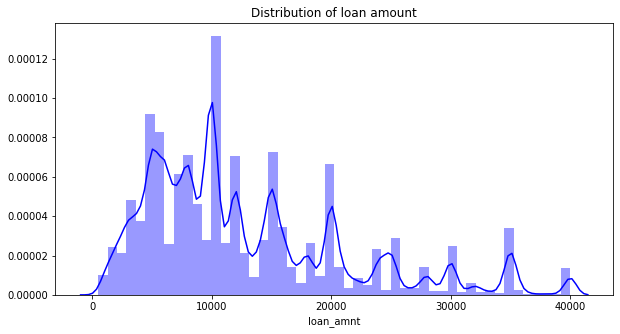

In [14]:
''' histogram of loan amount  '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['loan_amnt'], color = 'blue')  
plt.title('Distribution of loan amount')   

plt.plot()   


[]

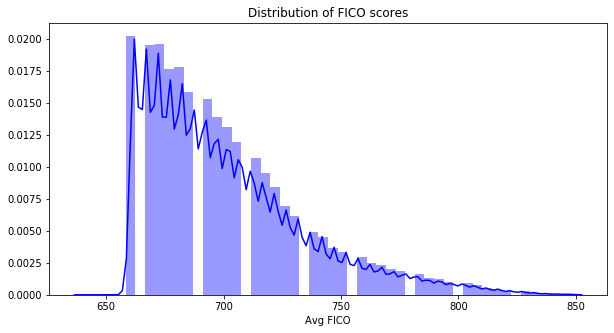

In [15]:
''' histogram of FICO score   '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['Avg FICO'], color = 'blue')     
plt.title('Distribution of FICO scores')   

plt.plot()    


[]

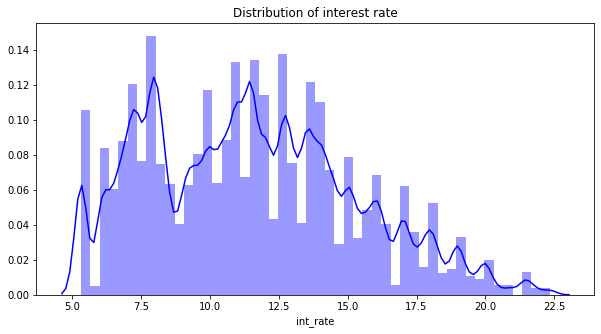

In [16]:
''' histogram of interest rate   '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['int_rate'], color = 'blue')     
plt.title('Distribution of interest rate')   

plt.plot() 


[]

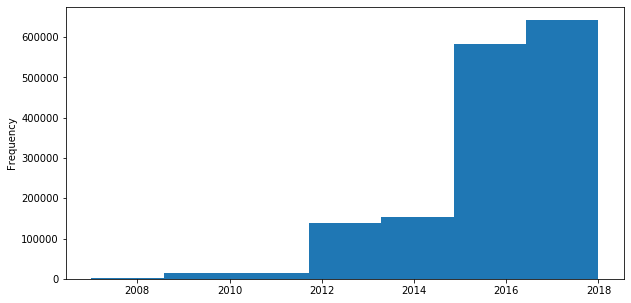

In [17]:
''' histogram of loan issued_yr   '''

plt.figure(figsize = (10, 5))  
df_accepted['issued_yr'].plot.hist(bins = 7) 

plt.plot()     


In [18]:
''' value count of loan purpose '''     

df_accepted['purpose'].value_counts(ascending = True, dropna = False) 


educational              356
renewable_energy        1079
wedding                 1785
house                   8865
moving                 11769
vacation               13479
small_business         15865
car                    18776
medical                21051
major_purchase         36672
home_improvement      103537
other                 103979
credit_card           375029
debt_consolidation    834340
Name: purpose, dtype: int64

In [19]:
''' value count of loan purpose (percentage) '''     

100 * df_accepted['purpose'].value_counts(ascending = True, dropna = False) / len(df_accepted)  


educational            0.023019
renewable_energy       0.069767
wedding                0.115416
house                  0.573199
moving                 0.760968
vacation               0.871535
small_business         1.025810
car                    1.214032
medical                1.361131
major_purchase         2.371164
home_improvement       6.694569
other                  6.723148
credit_card           24.248892
debt_consolidation    53.947350
Name: purpose, dtype: float64

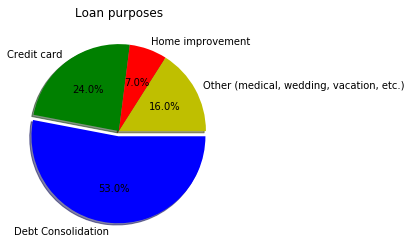

In [20]:
''' Pie chart of loan purpose '''

   
values = [53, 24, 7, 16]
colors = ['b', 'g', 'r', 'y']
labels = ['Debt Consolidation', 'Credit card', 'Home improvement', 'Other (medical, wedding, vacation, etc.)']
explode = (0.06, 0, 0, 0)

plt.pie(values, 
        colors = colors, 
        labels = labels, 
        explode = explode, 
        autopct = '%1.1f%%', 
        counterclock = False, 
        shadow = True)

plt.title('Loan purposes')

plt.show()


In [ ]:

#pd.pivot_table()


In [21]:
''' value count of loan GRADE  '''

df_accepted['grade'].value_counts(ascending = True, dropna = False)    


D    184023
A    408806
C    419411
B    534342
Name: grade, dtype: int64

In [22]:
''' Median FICO scores and grade => info for box plot '''   

df_accepted.groupby('grade')['Avg FICO'].median().sort_values(ascending = False)   


grade
A    727
B    692
C    682
D    677
Name: Avg FICO, dtype: int32

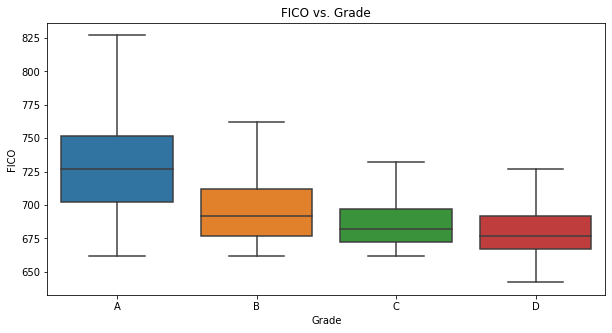

In [23]:
''' Boxplot of Avg FICO vs. Grade '''   

plt.figure(figsize = (10, 5)) 
ax = sns.boxplot(x = 'grade', y = 'Avg FICO', showfliers = False, data = df_accepted, order = ['A', 'B', 'C', 'D']) 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)  
plt.title('FICO vs. Grade')   
plt.xlabel('Grade')   
plt.ylabel('FICO')

plt.show()      


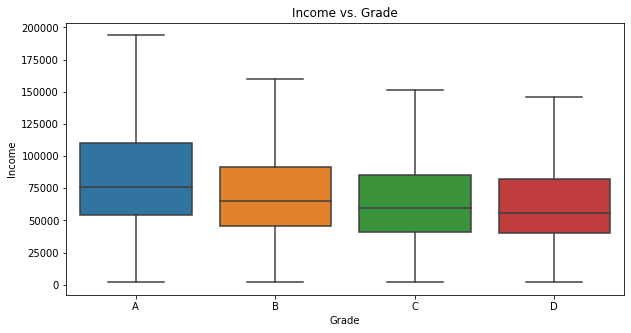

In [24]:
''' Boxplot of income vs grade '''   

plt.figure(figsize = (10, 5)) 
ax = sns.boxplot(x = 'grade', y = 'annual_inc_joint', showfliers = False, data = df_accepted, order = ['A', 'B', 'C', 'D']) 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)  
plt.title('Income vs. Grade')   
plt.xlabel('Grade')   
plt.ylabel('Income')

plt.show()      


In [25]:
''' Median DTI and grade => info for box plot '''   

df_accepted.groupby('grade')['dti_joint'].median().sort_values(ascending = False)   


grade
D    19.78
C    18.55
B    16.87
A    15.12
Name: dti_joint, dtype: float64

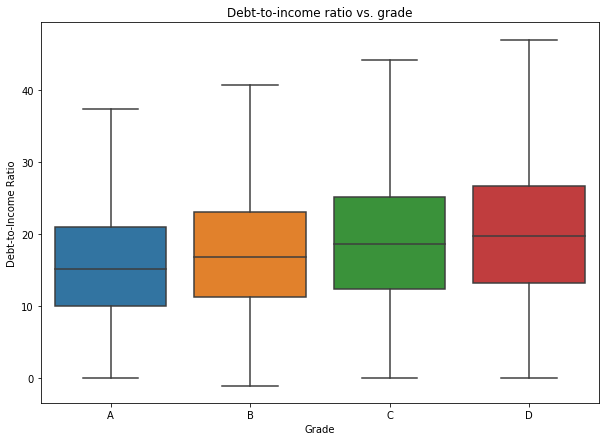

In [26]:
''' Boxplot of DTI vs Grade '''   

plt.figure(figsize = (10, 7)) 
ax = sns.boxplot(x = 'grade', y = 'dti_joint', showfliers = False, data = df_accepted, order = ['A', 'B', 'C', 'D']) 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)  
plt.title('Debt-to-income ratio vs. grade') 
plt.xlabel('Grade')
plt.ylabel('Debt-to-Income Ratio')

plt.show()      



In [52]:
''' Median employment length and grade => Wow! 6yrs across the board ''' 

df_accepted.groupby('grade')['emp_length_n'].median().sort_values(ascending = False)


grade
D    6
C    6
B    6
A    6
Name: emp_length_n, dtype: int32

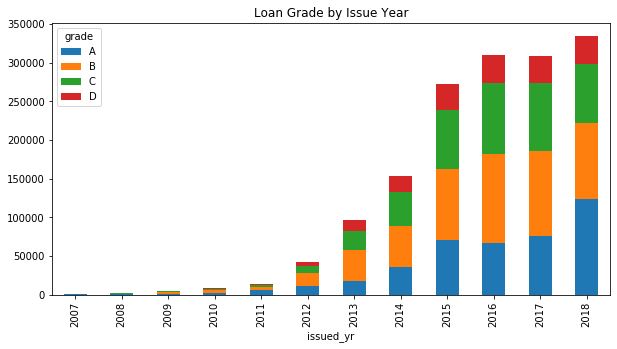

In [27]:
''' Plot of loan grade by year '''

df2 = df_accepted.groupby(['issued_yr','grade'])['grade'].count().unstack('grade')#.fillna(0)
df2.plot(kind = 'bar', stacked = True, figsize = (10, 5))   
plt.title('Loan Grade by Issue Year')

plt.show()    


In [28]:
''' loan grade by issued year => table view '''

pd.pivot_table(df_accepted, index = ['grade'], columns = ['issued_yr'], 
              aggfunc = {'issued_yr': 'count'},
              fill_value = 0, dropna = False)


issued_yr                                                     \
issued_yr      2007 2008  2009  2010  2011   2012   2013   2014   2015   
grade                                                                    
A                78  318  1202  2562  5576  10744  17041  35295  70070   
B                98  593  1443  2802  4713  16789  40274  53406  91684   
C               141  579  1347  2067  2198   9891  24670  43986  77386   
D                99  419   815  1252  1261   5080  14489  20494  32714   

                                   
issued_yr    2016    2017    2018  
grade                              
A           66801   76236  122883  
B          114653  108831   99056  
C           92226   88323   76597  
D           36665   34535   36200

In [29]:
''' loan purpose by grade '''    

pd.pivot_table(df_accepted, index = ['grade', 'purpose'], columns = ['issued_yr'], 
               #values = ['purpose'],
               aggfunc = {'purpose': 'count'}, fill_value = 0, dropna = False)


purpose                                            \
issued_yr                   2007 2008 2009  2010  2011  2012   2013   2014   
grade purpose                                                                
A     car                      3   18   85   111   322   348    232    351   
      credit_card              9   50  171   356   781  2025   5598  13962   
      debt_consolidation      13   70  361   987  2304  5174   9275  17933   
      educational              5   14   49    20     0     0      0      0   
      home_improvement        10   28  122   224   539   891   1305   1752   
      house                    1    3   18    18    56   122    103     11   
      major_purchase           2   23   84   277   421   497    442    635   
      medical                  1    7   25    53   121   187     15     97   
      moving                   3    6   24    51    85   107      2     10   
      other                   26   66  184   290   506   700     52    460   
      renewable_energy         0    1    1     4    22    20      0      2   
      small_business           1   17   39    79   203   367     10     39   
      vacation                 3    4    8    38    74   105      7     43   
      wedding                  1   11   31    54   142   201      0      0   
B     car                      2   11   46    61   151   221    331    457   
      credit_card             11   97  188   406   769  3892  12049  15691   
      debt_consolidation      21  213  622  1251  2355  9569  24236  31189   
      educational              6   18   51    32     0     0      0      0   
      home_improvement         9   40  108   208   279   790   2126   2600   
      house                    1    9   25    23    35   101    173     53   
      major_purchase           3   26   68   189   192   373    639    833   
      medical                  2   12   20    44    84   185     83    410   
      moving                   2    8   23    46    87   143     35    127   
      other                   27   88  189   350   403   828    441   1636   
      renewable_energy         0    1    4    11    13    21      3      9   
      small_business          11   45   49    95   160   335     94    196   
      vacation                 0    6    4    32    70   116     35    202   
      wedding                  3   19   46    54   115   215     29      3   
C     car                      3   15   30    28    64   107    206    406   
      credit_card             23  103  159   263   328  2121   5807   7640   
      debt_consolidation      45  235  637   983  1083  5892  15095  27983   
      educational             11   21   51    28     0     0      0      0   
      home_improvement         4   36   98   123   139   414   1274   2513   
      house                    3    4   14    13    20    52    111    123   
      major_purchase           1   21   58   117   105   186    422    798   
      medical                  2   13   23    36    40   135    162    637   
      moving                   4    9    9    31    47    76     80    325   
      other                   28   83  155   300   192   469   1044   2714   
      renewable_energy         0    1    0     5     8    12      7     32   
      small_business          13   24   68    65    84   200    248    451   
      vacation                 1    4    9    22    25    74    111    362   
      wedding                  3   10   36    53    63   153    103      2   
D     car                      2    6   21    20    17    45    108    201   
      credit_card             16   75   72   127   170   945   2309   2209   
      debt_consolidation      45  204  390   657   662  3089   7472  12838   
      educational              3   13   18    14     0     0      0      0   
      home_improvement         6   12   37    74    65   185    585   1184   
      house                    1    6    7     6    12    28     68    140   
      major_purchase           3   14   36    7

In [30]:
''' Loan status by grade and year '''

pd.pivot_table(df_accepted, index = ['grade', 'loan_status_n'], columns = ['issued_yr'], 
              aggfunc = {'issued_yr': 'count'},
              fill_value = 0, dropna = False)  


issued_yr                                              \
issued_yr                2007 2008  2009  2010  2011   2012   2013   2014   
grade loan_status_n                                                         
A     0                     4   19    81   112   357    778    777   1901   
      1                    74  299  1121  2450  5219   9966  16264  33394   
B     0                    16  103   176   270   499   2108   3937   5729   
      1                    82  490  1267  2532  4214  14681  36337  47677   
C     0                    34  122   206   279   341   1738   3772   7563   
      1                   107  457  1141  1788  1857   8153  20898  36423   
D     0                    31  111   147   233   228   1075   2955   4543   
      1                    68  308   668  1019  1033   4005  11534  15951   

                                                    
issued_yr             2015    2016    2017    2018  
grade loan_status_n                                 
A     0               3806    3723    2576    1533  
      1              66264   63078   73660  121350  
B     0              10927   14040    8661    3269  
      1              80757  100613  100170   95787  
C     0              15054   18001   12220    4113  
      1              62332   74225   76103   72484  
D     0               8581   10078    6881    3009  
      1              24133   26587   27654   33191

In [31]:
''' interest rate by issued year and grade => table view '''   

pd.pivot_table(df_accepted, index = ['grade', 'term'], columns = ['issued_yr'], 
               values = ['int_rate'], aggfunc = [np.median], fill_value = 0, dropna = False)



median                                                          \
           int_rate                                                           
issued_yr      2007   2008   2009   2010   2011   2012   2013   2014   2015   
grade term                                                                    
A     36       7.75   8.32   8.94   7.14   7.29   7.90   7.90   7.69   6.92   
B     36       9.33  10.39  11.83  10.75  10.99  12.12  11.99  10.99   9.99   
C     36      10.91  11.78  13.22  13.48  13.49  15.31  15.31  13.98  13.18   
D     36      12.49  13.30  14.96  15.21  16.29  18.49  18.55  16.99  16.55   

                                 
                                 
issued_yr    2016   2017   2018  
grade term                       
A     36     6.99   7.21   7.21  
B     36    10.49  10.49  10.72  
C     36    13.67  13.99  14.52  
D     36    17.99  18.06  19.03

In [33]:
''' interest rate by issued year and grade '''   

#df_accepted.groupby(['issued_yr', 'grade', 'term'])[['int_rate']].median() 


' interest rate by issued year and grade '

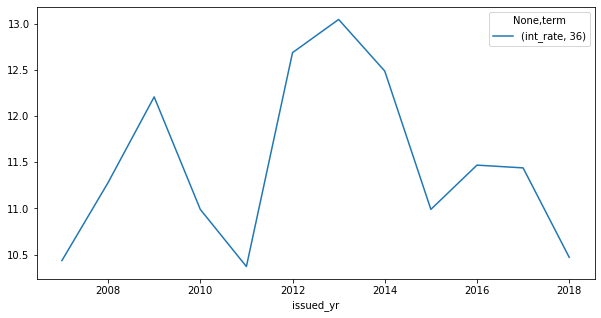

In [32]:
''' Plot of interest rate '''   

# plot data
fig, ax = plt.subplots(figsize = (10,5))

# use unstack()
df_accepted.groupby(['issued_yr', 'term'])[['int_rate']].median().unstack().plot(ax = ax)    



###  Loan status (binary classification: 1 = performing, 0 = nonperforming)   

In [35]:
''' Loan status breakdown '''

df_accepted['loan_status_n'].value_counts(ascending = True, dropna = False)   


0     166704
1    1379881
Name: loan_status_n, dtype: int64

In [36]:
''' value count of loan status (percentage) '''     

100 * df_accepted['loan_status_n'].value_counts(ascending = True, dropna = False) / len(df_accepted)


0    10.778845
1    89.221155
Name: loan_status_n, dtype: float64

In [37]:
''' loan status by year => table view '''   

pd.pivot_table(df_accepted, index = ['loan_status_n'], columns = ['issued_yr'],
              aggfunc = {'issued_yr': 'count'})



issued_yr                                                 \
issued_yr          2007  2008  2009  2010   2011   2012   2013    2014   
loan_status_n                                                            
0                    85   355   610   894   1425   5697  11446   19731   
1                   331  1555  4202  7792  12332  36803  85019  133443   

                                               
issued_yr        2015    2016    2017    2018  
loan_status_n                                  
0               38372   45836   30331   11922  
1              233477  264539  277595  322793

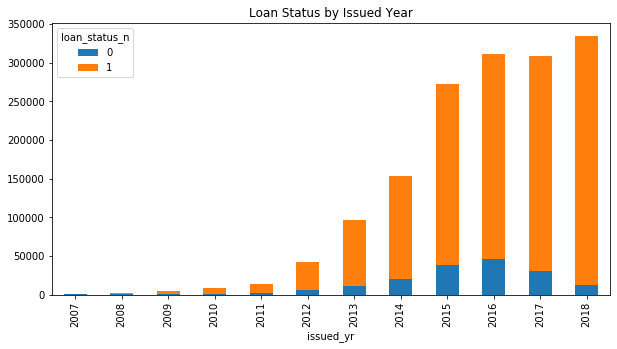

In [38]:
''' Plot of loan status by issued year '''

df3 = df_accepted.groupby(['issued_yr','loan_status_n'])['loan_status_n'].count().unstack('loan_status_n')#.fillna(0)
df3.plot(kind = 'bar', stacked = True, figsize = (10, 5))   
plt.title('Loan Status by Issued Year')

plt.show() 


In [39]:
''' Loan status by grade and year '''

pd.pivot_table(df_accepted, index = ['grade', 'loan_status_n'], columns = ['issued_yr'], 
              aggfunc = {'issued_yr': 'count'},
              fill_value = 0, dropna = False)


issued_yr                                              \
issued_yr                2007 2008  2009  2010  2011   2012   2013   2014   
grade loan_status_n                                                         
A     0                     4   19    81   112   357    777    778   1900   
      1                    74  299  1122  2451  5219   9964  16256  33396   
B     0                    16  103   176   269   499   2108   3941   5727   
      1                    82  490  1269  2534  4221  14678  36337  47678   
C     0                    34  122   206   280   341   1737   3772   7562   
      1                   107  458  1141  1789  1859   8156  20900  36425   
D     0                    31  111   147   233   228   1075   2955   4542   
      1                    68  308   670  1018  1033   4005  11526  15944   

                                                    
issued_yr             2015    2016    2017    2018  
grade loan_status_n                                 
A     0               3802    3725    2573    1533  
      1              66260   63078   73628  121332  
B     0              10933   14034    8655    3268  
      1              80762  100628  100183   95785  
C     0              15053   18007   12222    4116  
      1              62341   74235   76117   72486  
D     0               8584   10070    6881    3005  
      1              24114   26598   27667   33190

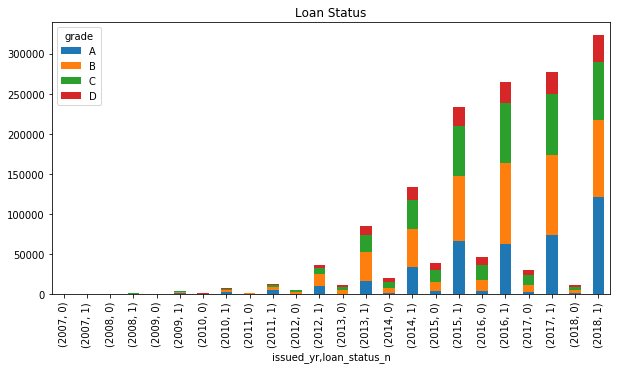

In [40]:
''' Plot of loan status by grade and by year '''

df4 = df_accepted.groupby(['issued_yr','grade', 'loan_status_n'])['loan_status_n'].count().unstack('grade')    
df4.plot(kind = 'bar', stacked = True, figsize = (10, 5))   
plt.title('Loan Status')

plt.show() 


###  Document verification  

In [41]:
''' document verification '''

#df_accepted.groupby(['grade', 'issued_yr', 'verification_status_joint_n'])[['verification_status_joint_n']].count()    



' document verification '

In [42]:
''' document verification => table view '''   

pd.pivot_table(df_accepted, index = ['grade', 'verification_status_joint_n'], columns = ['issued_yr'],   
               aggfunc = {'verification_status_joint_n': 'count'}, fill_value = 0, dropna = False)   





verification_status_joint_n                  \
issued_yr                                                2007 2008 2009  2010   
grade verification_status_joint_n                                               
A     0                                                    78  287  828  1414   
      1                                                     0   31  375  1149   
B     0                                                    98  527  879  1588   
      1                                                     0   66  566  1215   
C     0                                                   141  485  764  1148   
      1                                                     0   95  583   921   
D     0                                                    99  356  454   646   
      1                                                     0   63  363   605   

                                                                           \
issued_yr                          2011  2012   2013   2014   2015   2016   
grade verification_status_joint_n                                           
A     0                            2435  5462   6226  15813  29565  32627   
      1                            3141  5279  10808  19483  40497  34176   
B     0                            1792  8062  16334  21311  28237  36429   
      1                            2928  8724  23944  32094  63458  78233   
C     0                             787  4248   9305  14239  17958  17678   
      1                            1413  5645  15367  29748  59436  74564   
D     0                             377  1725   5680   5700   6380   6131   
      1                             884  3355   8801  14786  26318  30537   

                                                 
issued_yr                           2017   2018  
grade verification_status_joint_n                
A     0                            42986  65728  
      1                            33215  57137  
B     0                            42363  42269  
      1                            66475  56784  
C     0                            24508  27694  
      1                            63831  48908  
D     0                             8150  12219  
      1                            26398  23976

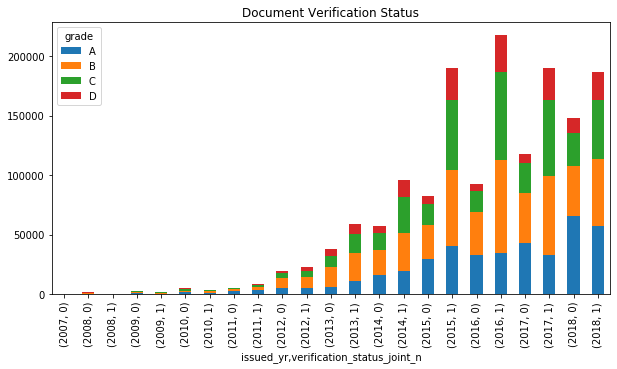

In [43]:
''' Plot of document verification status by and by year '''

df6 = df_accepted.groupby(['issued_yr','grade', 'verification_status_joint_n'])['verification_status_joint_n'].count().unstack('grade')    
df6.plot(kind = 'bar', stacked = True, figsize = (10, 5))   
plt.title('Document Verification Status')

plt.show() 


In [44]:

pd.pivot_table(df_accepted, index = ['grade', 'verification_status_joint_n', 'loan_status_n'],  
               columns = ['issued_yr'], 
               aggfunc = {'issued_yr': 'count'},
               fill_value = 0, dropna = False) 




issued_yr                  \
issued_yr                                            2007 2008 2009  2010   
grade verification_status_joint_n loan_status_n                             
A     0                           0                     4   16   54    58   
                                  1                    74  271  774  1356   
      1                           0                     0    3   27    54   
                                  1                     0   28  348  1095   
B     0                           0                    16   88  102   158   
                                  1                    82  439  777  1430   
      1                           0                     0   15   74   111   
                                  1                     0   51  492  1104   
C     0                           0                    34   99  132   165   
                                  1                   107  386  632   983   
      1                           0                     0   23   74   115   
                                  1                     0   72  509   806   
D     0                           0                    31   91   84   120   
                                  1                    68  265  370   526   
      1                           0                     0   20   63   113   
                                  1                     0   43  300   492   

                                                                           \
issued_yr                                        2011  2012   2013   2014   
grade verification_status_joint_n loan_status_n                             
A     0                           0               176   373    256    771   
                                  1              2259  5089   5970  15042   
      1                           0               181   404    522   1129   
                                  1              2960  4875  10286  18354   
B     0                           0               195   968   1609   2166   
                                  1              1597  7094  14725  19145   
      1                           0               304  1140   2332   3561   
                                  1              2624  7584  21612  28533   
C     0                           0               124   739   1392   2299   
                                  1               663  3509   7913  11940   
      1                           0               217   998   2380   5263   
                                  1              1196  4647  12987  24485   
D     0                           0                77   370   1092   1083   
                                  1               300  1355   4588   4617   
      1                           0               151   705   1863   3459   
                                  1               733  2650   6938  11327   

                                                                             
issued_yr                                         2015   2016   2017   2018  
grade verification_status_joint_n loan_status_n                              
A     0                           0               1397   1649   1223    649  
                                  1              28168  30978  41763  65079  
      1                           0               2405   2076   1350    884  
                                  1              38092  32100  31865  56253  
B     0                           0               3057   3874   2932   1170  
                                  1              25180  32555  39431  41099  
      1                           0               7876  10160   5723   2098  
                                  1              55582  68073  60752  54686  
C     0                           0               3078   3037   3012   1249  
                                  1              14880  14641  21496  26445  
      1                           0              11975  14970   9210   2867  
                            

<p><a name="Borrower profile"></a></p> 

### 6. Borrower profile       

In [ ]:
''' borrower profile '''

# pd.pivot_table(df_accepted, index = ['grade'], 
#                columns = ['Avg FICO', 'int_rate', 'annual_inc_joint', 'dti_joint', 'emp_length_n'])#,
#                #aggfunc = [np.median])   


In [14]:

df_accepted.groupby('grade')[['Avg FICO', 'int_rate', 'annual_inc_joint', 
                              'dti_joint', 'emp_length_n', 'home_ownership_n', 'max_bal_bc',  
                              'revol_bal', 'revol_util', 
                              'avg_cur_bal','open_acc', 'mths_since_last_delinq']].median()        


,Avg FICO,int_rate,annual_inc_joint,dti_joint,emp_length_n,home_ownership_n,max_bal_bc,revol_bal,revol_util,avg_cur_bal,open_acc,mths_since_last_delinq
grade,,,,,,,,,,,,
A,727,7.21,76000.0,15.12,6,2,2405.0,11453.0,34.2,9200.0,11.0,500.0
B,692,10.78,65000.0,16.87,6,2,1749.0,10377.0,50.3,5850.0,10.0,76.0
C,682,13.99,60000.0,18.55,6,2,1615.0,9619.0,55.7,5027.0,10.0,71.0
D,677,17.99,56000.0,19.78,6,2,1086.0,9205.0,58.2,4725.0,10.0,71.0


In [17]:
# state 

df_accepted.groupby(['grade', 'issued_yr'])[['addr_state']].agg(pd.Series.mode)     



addr_state
grade issued_yr           
A     2007              MA
      2008              CA
      2009              CA
      2010              CA
      2011              CA
      2012              CA
      2013              CA
      2014              CA
      2015              CA
      2016              CA
      2017              CA
      2018              CA
B     2007              NY
      2008              CA
      2009              CA
      2010              CA
      2011              CA
      2012              CA
      2013              CA
      2014              CA
      2015              CA
      2016              CA
      2017              CA
      2018              CA
C     2007              FL
      2008              CA
      2009              CA
      2010              CA
      2011              CA
      2012              CA
      2013              CA
      2014              CA
      2015              CA
      2016              CA
      2017              CA
      2018              CA
D     2007              NY
      2008              CA
      2009              CA
      2010              CA
      2011              CA
      2012              CA
      2013              CA
      2014              CA
      2015              CA
      2016              CA
      2017              CA
      2018              CA